# Import the Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read the dataset

In [3]:
data = pd.read_csv('breast-cancer-wisconsin.csv')# header = None)

In [9]:
data.head()

,id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [11]:
mask1 = data['class']==2
mask2 = data['class']==4
data.loc[mask1, 'class'] = 0
data.loc[mask2, 'class'] = 1

In [25]:
data.head(26)

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
5,8,10,10,8,7,10,9,7,1,1
6,1,1,1,1,2,10,3,1,1,0
7,2,1,2,1,2,1,3,1,1,0
8,2,1,1,1,2,1,1,1,5,0
9,4,2,1,1,2,1,2,1,1,0


In [15]:
d = data.id
d.title = 'id'

In [16]:
d.head()

0    1000025
1    1002945
2    1015425
3    1016277
4    1017023
Name: id, dtype: int64

In [19]:
data.drop('id' , axis=1 , inplace=True)

# Exploratory Data Analysis

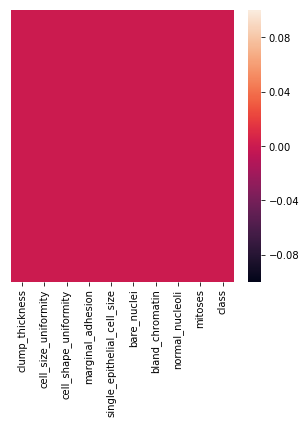

In [26]:
plt.figure(figsize=(5,5))
sns.heatmap(data.isnull(),yticklabels=False)

In [27]:
data.describe()

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,0.344778
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.475636
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
clump_thickness                699 non-null int64
cell_size_uniformity           699 non-null int64
cell_shape_uniformity          699 non-null int64
marginal_adhesion              699 non-null int64
single_epithelial_cell_size    699 non-null int64
bare_nuclei                    699 non-null float64
bland_chromatin                699 non-null int64
normal_nucleoli                699 non-null int64
mitoses                        699 non-null int64
class                          699 non-null int64
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [29]:
data.bare_nuclei[data['bare_nuclei']=='?'].count()

16

In [42]:
mask3 = data['bare_nuclei'] == '?'
data.loc[mask3, 'bare_nuclei'] = np.nan

In [71]:
data.head(25)

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0
5,8,10,10,8,7,10.0,9,7,1,1
6,1,1,1,1,2,10.0,3,1,1,0
7,2,1,2,1,2,1.0,3,1,1,0
8,2,1,1,1,2,1.0,1,1,5,0
9,4,2,1,1,2,1.0,2,1,1,0


In [49]:
data.bare_nuclei = pd.to_numeric(data.bare_nuclei)

# Handling Null Values

In [70]:
bnmean = round(data.bare_nuclei.mean() , 1)
data.bare_nuclei.fillna(bnmean , inplace=True)

# Scikit-Learn

In [73]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('class',axis=1), 
                                                    data['class'], test_size=0.30, 
                                                    random_state=101)

In [76]:
X_train.head()

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
435,10,8,10,1,3,10.0,5,1,1
541,3,1,1,1,2,1.0,1,1,1
381,10,6,3,6,4,10.0,7,8,4
611,5,10,10,10,5,2.0,8,5,1
647,1,1,1,3,2,1.0,1,1,1


In [77]:
y_train.head()

435    1
541    0
381    1
611    1
647    0
Name: class, dtype: int64

# Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
logmodel = LogisticRegression()

In [80]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [81]:
predictions = logmodel.predict(X_test)

In [82]:
from sklearn.metrics import confusion_matrix

In [83]:
confusion_matrix(y_test, predictions)

array([[127,   2],
       [  6,  75]], dtype=int64)